### 20. 다음은 어느 회사의 남녀별 입사시험 성적이다. 이 데이터를 이용하여 남녀별 히스토그램, 점그림, 줄기-잎그림을 그려 분석하라.

|||
|---|---|
|남자|49 86 40 45 48 93 97 58 58 98<br>58 82 52 56 50 85 80 60 62 80<br>62 72 65 60 64 70 78 67 69 88|
|여자|60 72 66 65 75 78 62 64 74 58<br>68 72 67 61 62 72 79 71 74 73|


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [2]:
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# 데이터 입력
male_scores_raw = '49 86 40 45 48 93 97 58 58 98 58 82 52 56 50 85 80 60 62 80 62 72 65 60 64 70 78 67 69 88'
female_scores_raw = '60 72 66 65 75 78 62 64 74 58 68 72 67 61 62 72 79 71 74 73'

# 줄바꿈 태그 제거 및 공백으로 분리
male_scores = [int(s) for s in male_scores_raw.split()]
female_scores = [int(s) for s in female_scores_raw.split()]

In [4]:
# 데이터프레임 생성
df_male = pd.DataFrame({'성별': '남자', '점수': male_scores})
df_female = pd.DataFrame({'성별': '여자', '점수': female_scores})
df = pd.concat([df_male, df_female], ignore_index=True)

In [8]:
print("--- 데이터 정보 ---")
print(df.describe())
print("\n--- 데이터 미리보기 ---")
print(df.head())

--- 데이터 정보 ---
              점수
count  50.000000
mean   68.100000
std    12.814612
min    40.000000
25%    60.000000
50%    67.000000
75%    74.750000
max    98.000000

--- 데이터 미리보기 ---
   성별  점수
0  남자  49
1  남자  86
2  남자  40
3  남자  45
4  남자  48


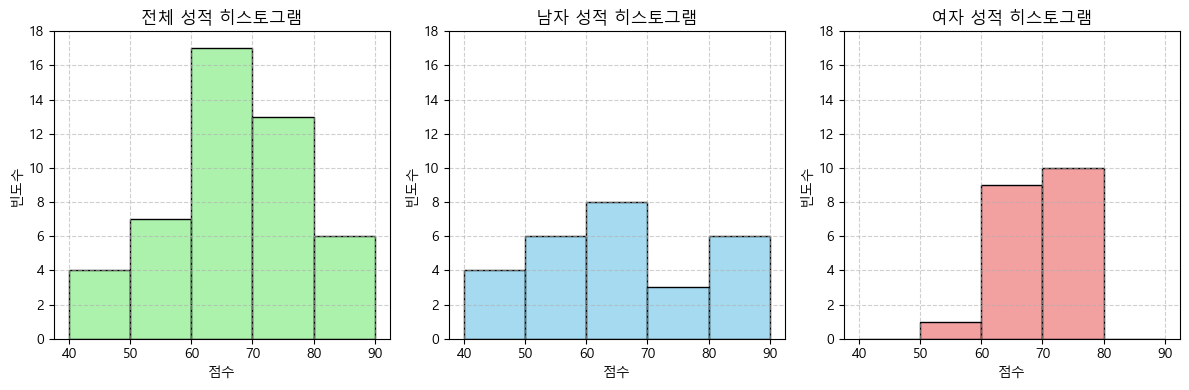

In [30]:
# 1. 히스토그램 (Histogram)

# 3개의 서브플롯 생성
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# 히스토그램 설정
df_total = pd.concat([df_male, df_female], ignore_index=True)
dataframes = [df_total, df_male, df_female]
titles = ['전체 성적 히스토그램', '남자 성적 히스토그램', '여자 성적 히스토그램']
colors = ['lightgreen', 'skyblue', 'lightcoral']
custom_bins = np.arange(40, 100, 10)
y_min = 0
y_max = 18

# 히스토그램 그리기
for i, ax in enumerate(axes):
    sns.histplot(dataframes[i], x='점수', bins=custom_bins, kde=False, ax=axes[i], color=colors[i])
    ax.set_title(titles[i])    
    ax.set_xlabel('점수')
    ax.set_ylabel('빈도수')
    ax.set_ylim(y_min, y_max)
    ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

Grouped bar chart with value labels saved as 'grouped_bar_chart_with_values.png'.


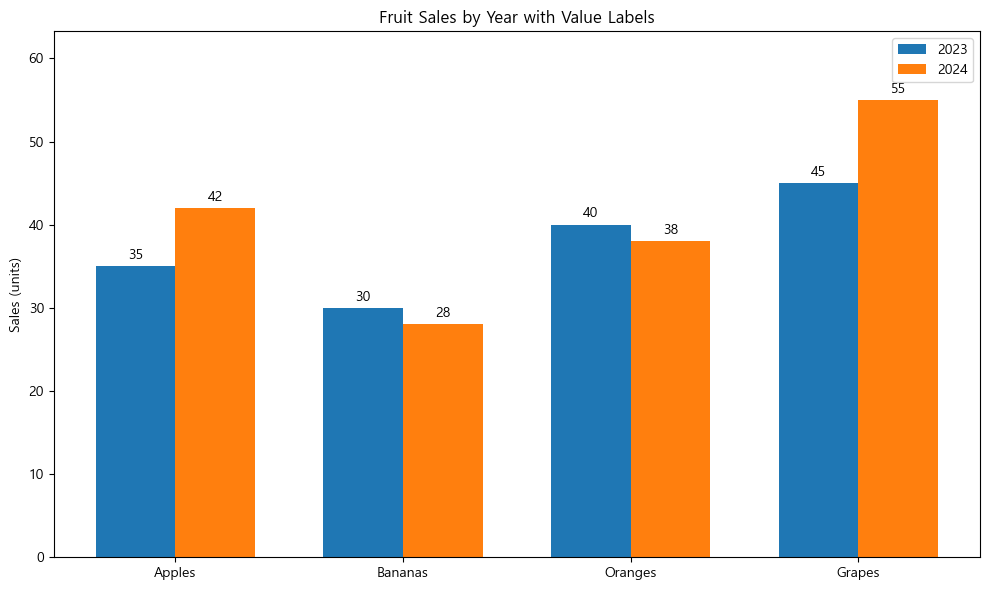

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터 정의 (이전과 동일)
categories = ['Apples', 'Bananas', 'Oranges', 'Grapes']
sales_2023 = [35, 30, 40, 45]
sales_2024 = [42, 28, 38, 55]

# 그룹형 막대그래프를 위한 x축 위치 설정 (이전과 동일)
x = np.arange(len(categories))
width = 0.35  # 막대의 너비

# 그래프 생성 (이전과 동일)
fig, ax = plt.subplots(figsize=(10, 6)) # 그래프 크기 조절
rects1 = ax.bar(x - width/2, sales_2023, width, label='2023')
rects2 = ax.bar(x + width/2, sales_2024, width, label='2024')

# 각 막대 위에 값을 표시 (핵심 변경 부분!)
ax.bar_label(rects1, padding=3) # 2023년 막대 위에 값 추가
ax.bar_label(rects2, padding=3) # 2024년 막대 위에 값 추가


# 축 레이블과 제목, 범례 추가 (이전과 동일)
ax.set_ylabel('Sales (units)')
ax.set_title('Fruit Sales by Year with Value Labels')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# 레이블이 잘 보이도록 y축 범위 조정
ax.set_ylim(0, max(max(sales_2023), max(sales_2024)) * 1.15) # 최대값보다 약간 여유롭게 설정

plt.tight_layout() # 그래프 요소들이 겹치지 않도록 자동 조정
plt.savefig('grouped_bar_chart_with_values.png')

print("Grouped bar chart with value labels saved as 'grouped_bar_chart_with_values.png'.")

In [ ]:


# ==============================================================================
# 2. 점그림 (Dot Plot)
# ==============================================================================
print("\n--- 남녀별 점그림 ---")
plt.figure(figsize=(10, 5))
sns.stripplot(x='점수', y='성별', data=df, hue='성별', jitter=0.1, palette={'남자': 'skyblue', '여자': 'lightcoral'}, size=8)
plt.title('남녀별 입사시험 점그림')
plt.xlabel('점수')
plt.ylabel('성별')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='성별')
plt.savefig('gender_dotplot.png')
plt.show()

# ==============================================================================
# 3. 줄기-잎그림 (Stem-and-Leaf Plot)
# ==============================================================================
def stem_and_leaf_plot(data, title):
    """
    줄기-잎그림을 생성하고 출력하는 함수
    """
    print(f"\n--- {title} 줄기-잎그림 ---")
    
    # 10점 단위로 줄기를 설정하고 잎들을 저장할 딕셔너리 생성
    stems = {i: [] for i in range(10)}
    
    # 데이터 정렬
    sorted_data = sorted(data)
    
    for score in sorted_data:
        stem = score // 10
        leaf = score % 10
        stems[stem].append(leaf)
        
    print(f"줄기 | 잎")
    print("-" * 15)
    
    for stem in sorted(stems.keys()):
        if stems[stem]:
            leaves = " ".join(map(str, stems[stem]))
            print(f"{stem:4d} | {leaves}")

# 남성 데이터 줄기-잎그림
stem_and_leaf_plot(male_scores, '남자 성적')

# 여성 데이터 줄기-잎그림
stem_and_leaf_plot(female_scores, '여자 성적')

ModuleNotFoundError: No module named 'matplotlib'